# Modulo 4: Ejercicio 4
## Alumno: Jose Suarez

### Ejercicio 1:
Seaborn es una librería que contiene mucha utilidades. Una de ellas es un conjunto de dataset de ejemplos con los que tendremos datos para analizar y así no necesitaremos cargar archivos externos.
### a) Averiguar cuáles son algunos de los dataset que contiene Seaborn.

In [13]:
# Se cargan las librerias y se ajusta el thema de seaborn para mantener consistencia visual en los graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette=['#582572','#dddddd','#3D194F'],
              context="notebook",font_scale=1.5, rc={'figure.facecolor':'#6F2F91',
                                                     'axes.edgecolor':'#ffffff',
                                                     'axes.facecolor':'#A847DB',
                                                     'axes.labelcolor': '#ffffff',
                                                     'xtick.color': '#ffffff',
                                                     'ytick.color': '#ffffff',
                                                     "axes.titlecolor": "#ffffff",
                                                     "legend.facecolor": "#ffffff"
                                                     })

In [2]:
sns.get_dataset_names()
# Se tiene una gran cantidad de bases de datos con seaborn para poder practicar las  tecnicas aprendidas en el bootcamp
# Cada una con sus particularidades

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### b) Cargar el dataset de titanic, se utilizará en los siguientes ejercicios.

In [11]:
# Se carga la libreria y se traducen los datos para ajustarse a nuestros clientes.
datasetNombre = "titanic"
datasetDF = sns.load_dataset(datasetNombre)
datasetDF.rename(columns={"age":"Edad", "sex":"Sexo","class":"Clase", "fare":"Tarifa",
                          "survived":"Sobrevivientes", "embark_town":"Puerto de Embarque"}, inplace=True)
datasetDF["Sexo"] = datasetDF["Sexo"].apply(lambda x: "Femenino" if x == "female" else "Masculino")
datasetDF["Clase"] = datasetDF["Clase"].apply(lambda x: "Tercera" if x == "Third" else 
                                              ("Segunda" if x == "Second" else "Primera"))
datasetDF.head(10)

,Sobrevivientes,pclass,Sexo,Edad,sibsp,parch,Tarifa,embarked,Clase,who,adult_male,deck,Puerto de Embarque,alive,alone
0,0,3,Masculino,22.0,1,0,7.2500,S,Tercera,man,True,NaN,Southampton,no,False
1,1,1,Femenino,38.0,1,0,71.2833,C,Primera,woman,False,C,Cherbourg,yes,False
2,1,3,Femenino,26.0,0,0,7.9250,S,Tercera,woman,False,NaN,Southampton,yes,True
3,1,1,Femenino,35.0,1,0,53.1000,S,Primera,woman,False,C,Southampton,yes,False
4,0,3,Masculino,35.0,0,0,8.0500,S,Tercera,man,True,NaN,Southampton,no,True
5,0,3,Masculino,NaN,0,0,8.4583,Q,Tercera,man,True,NaN,Queenstown,no,True
6,0,1,Masculino,54.0,0,0,51.8625,S,Primera,man,True,E,Southampton,no,True
7,0,3,Masculino,2.0,3,1,21.0750,S,Tercera,child,False,NaN,Southampton,no,False
8,1,3,Femenino,27.0,0,2,11.1333,S,Tercera,woman,False,NaN,Southampton,yes,False
9,1,2,Femenino,14.0,1,0,30.0708,C,Segunda,child,False,NaN,Cherbourg,yes,False


### c) Confeccione un gráfico de barras para visualizar hombres y mujeres que han sobrevivido.

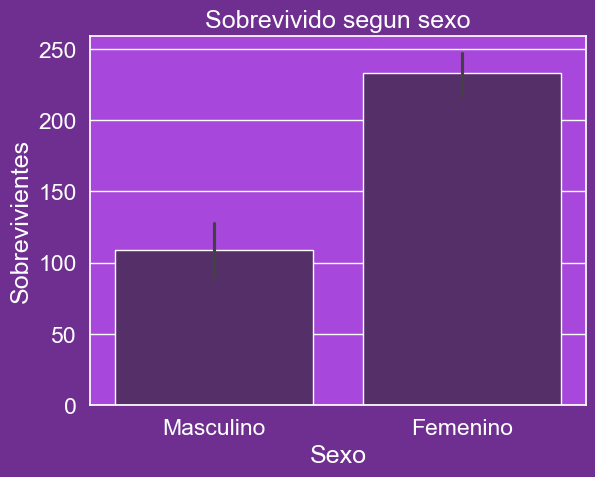

In [12]:
# distHyMSobrevivientes = datasetDF[["sex","survived"]].groupby("sex").sum().rename(columns={"survived":"Cuenta de sobrevivientes"}, 
#                                                                                   index = {"sex":"sexo"})
# print(distHyMSobrevivientes)
# sns.barplot(y = distHyMSobrevivientes["Cuenta de sobrevivientes"] , x = ["Femenino", "Masculino"])
sns.barplot(datasetDF, x = "Sexo", y ="Sobrevivientes", estimator=np.sum)
plt.title("Sobrevivido segun sexo")
plt.show()

### d) Crear un gráfico de distribución de edades por clase de pasajero .

C:\Users\Motor-kun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


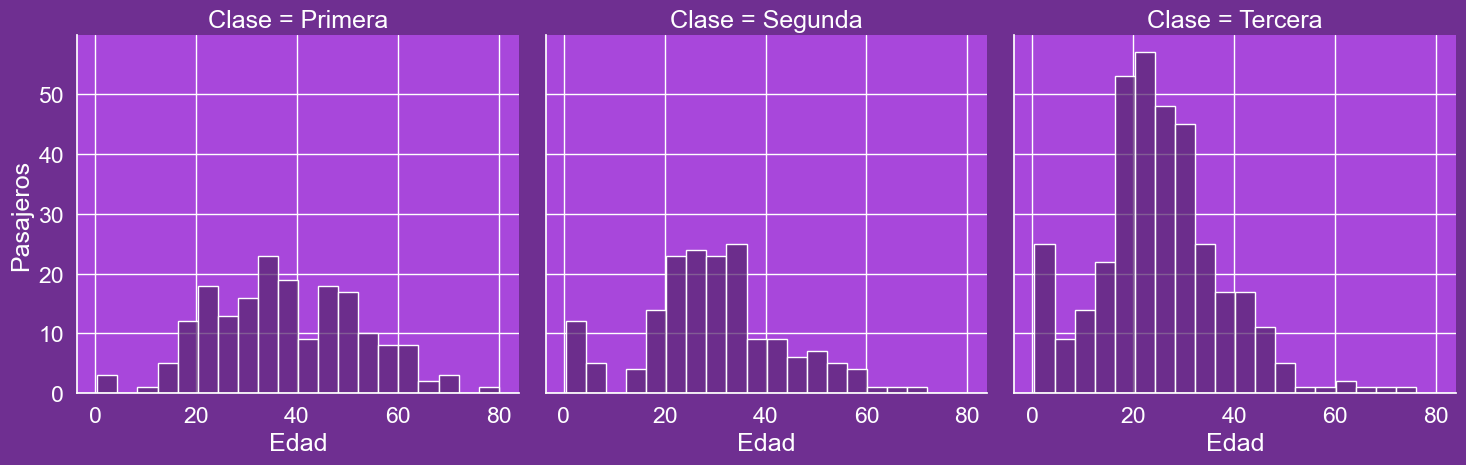

In [15]:
DistribucionEdadesClase = sns.displot(datasetDF, x = "Edad", col = "Clase")

DistribucionEdadesClase.set(ylabel = "Pasajeros")
plt.show()

### e) Diagrama de Caja (Boxplot) de Tarifas por Puerto de Embarque.

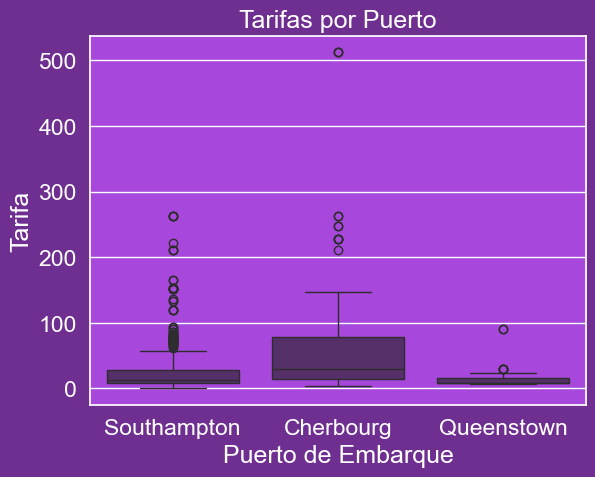

In [6]:
sns.boxplot(datasetDF, x = "Puerto de Embarque", y="Tarifa")
plt.title("Tarifas por Puerto")

plt.show()

### f) Gráfico de Violín de Edades por Supervivencia.

C:\Users\Motor-kun\AppData\Local\Temp\ipykernel_3552\2355082643.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  violin.set_xticklabels(["Muertos","Sobrevivio"])


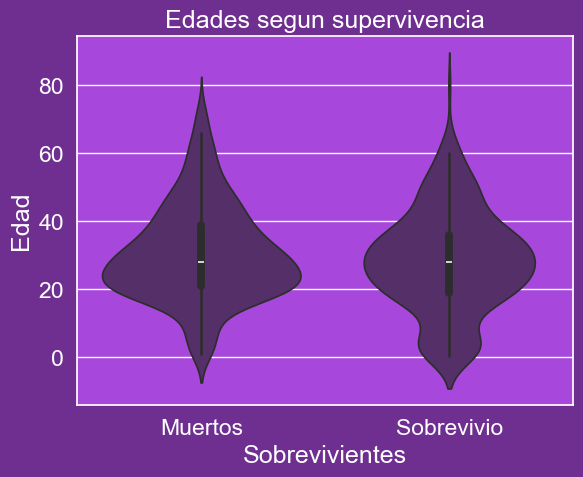

In [7]:
violin = sns.violinplot(datasetDF, y = "Edad", x= "Sobrevivientes")
plt.title("Edades segun supervivencia")
violin.set_xticklabels(["Muertos","Sobrevivio"])
plt.show()

### g) Diagrama de dispersión de Tarifas vs. Edades por Supervivencia.

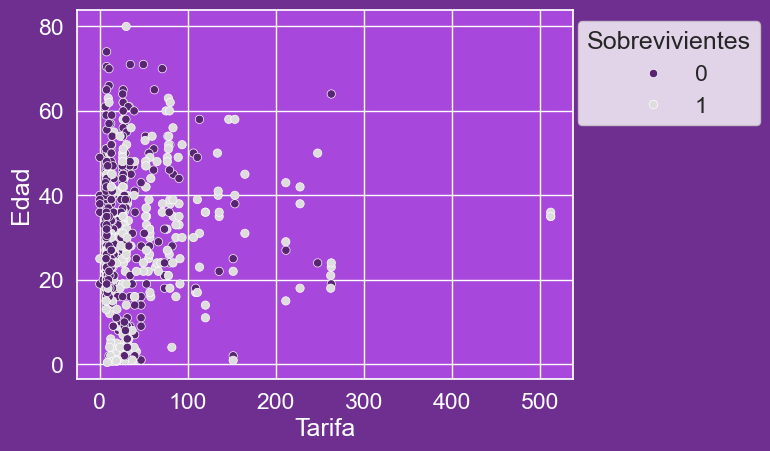

In [16]:
tarifaVsEdades = sns.scatterplot(datasetDF, x = "Tarifa", y = "Edad", hue = "Sobrevivientes")
sns.move_legend(tarifaVsEdades, loc = 1, bbox_to_anchor=(1.4,1))
plt.show()

### h) Crear un gráfico de pilas agrupadas según supervivencia vs clase, agrupadas por puerto de embarque.

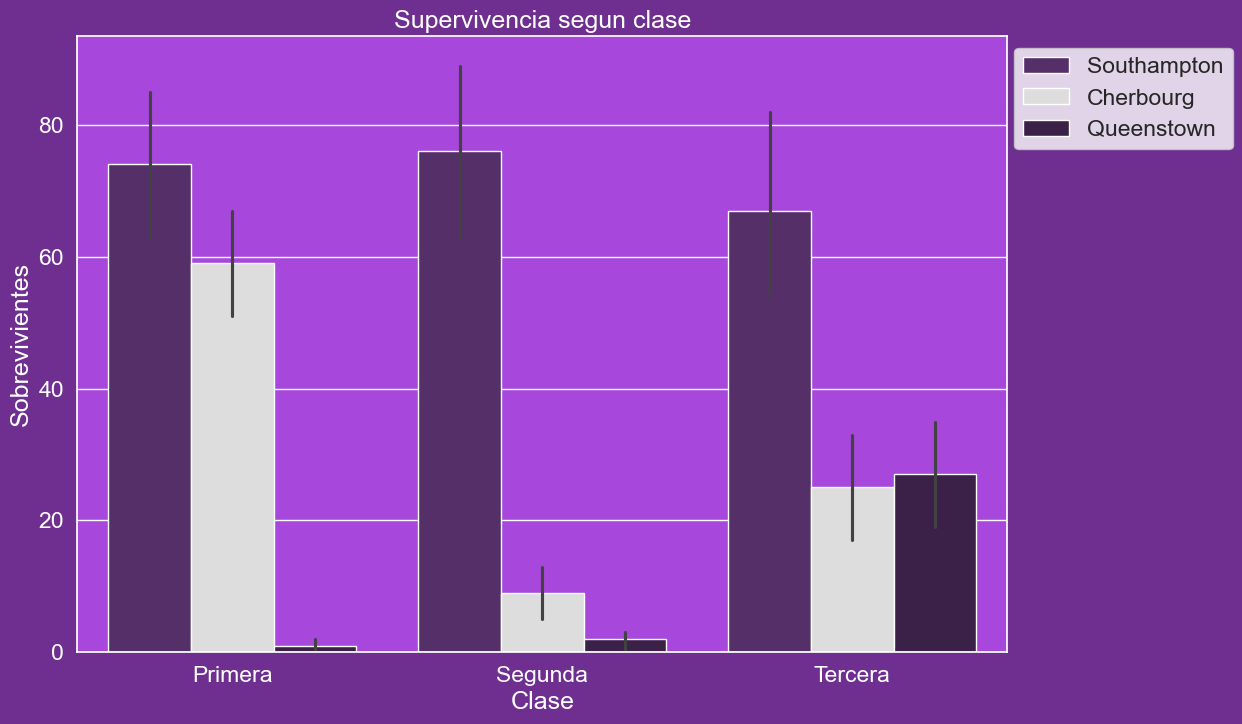

In [22]:
# no logre apilar las columnas, probe diferentes metodos pero ninguno lograba apilarlas, solo transponerlas
# se decide dejar el despliegue de las 3 columnas ya que de todas es la mas clara en mostrar los datos.

fig, ax = plt.subplots(figsize = (12,8))

# puerto1 = datasetDF["Puerto de Embarque"] == "Southampton"
# puerto2 = datasetDF["Puerto de Embarque"] == "Cherbourg"
# puerto3 = datasetDF["Puerto de Embarque"] == "Queenstown"

# sns.barplot(datasetDF[puerto1], x = "Clase", y= "Sobrevivientes", estimator=np.sum, label="Southampton")
# sns.barplot(datasetDF[puerto2], x = "Clase", y= "Sobrevivientes", estimator=np.sum, label="Cherbourg")
# sns.barplot(datasetDF[puerto3], x = "Clase", y= "Sobrevivientes", estimator=np.sum, label="Queenstown")

sns.barplot(datasetDF, x = "Clase", y= "Sobrevivientes", estimator=np.sum, hue= "Puerto de Embarque")

plt.title("Supervivencia segun clase")
plt.legend(loc = 1, bbox_to_anchor=(1.255,1))

plt.show()

### i) pairplot para mostrar gráficos de dispersión y histogramas de las variables 'Age', 'Fare' y 'Pclass' del Titanic, diferenciando entre los pasajeros que sobrevivieron y los que no.

C:\Users\Motor-kun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


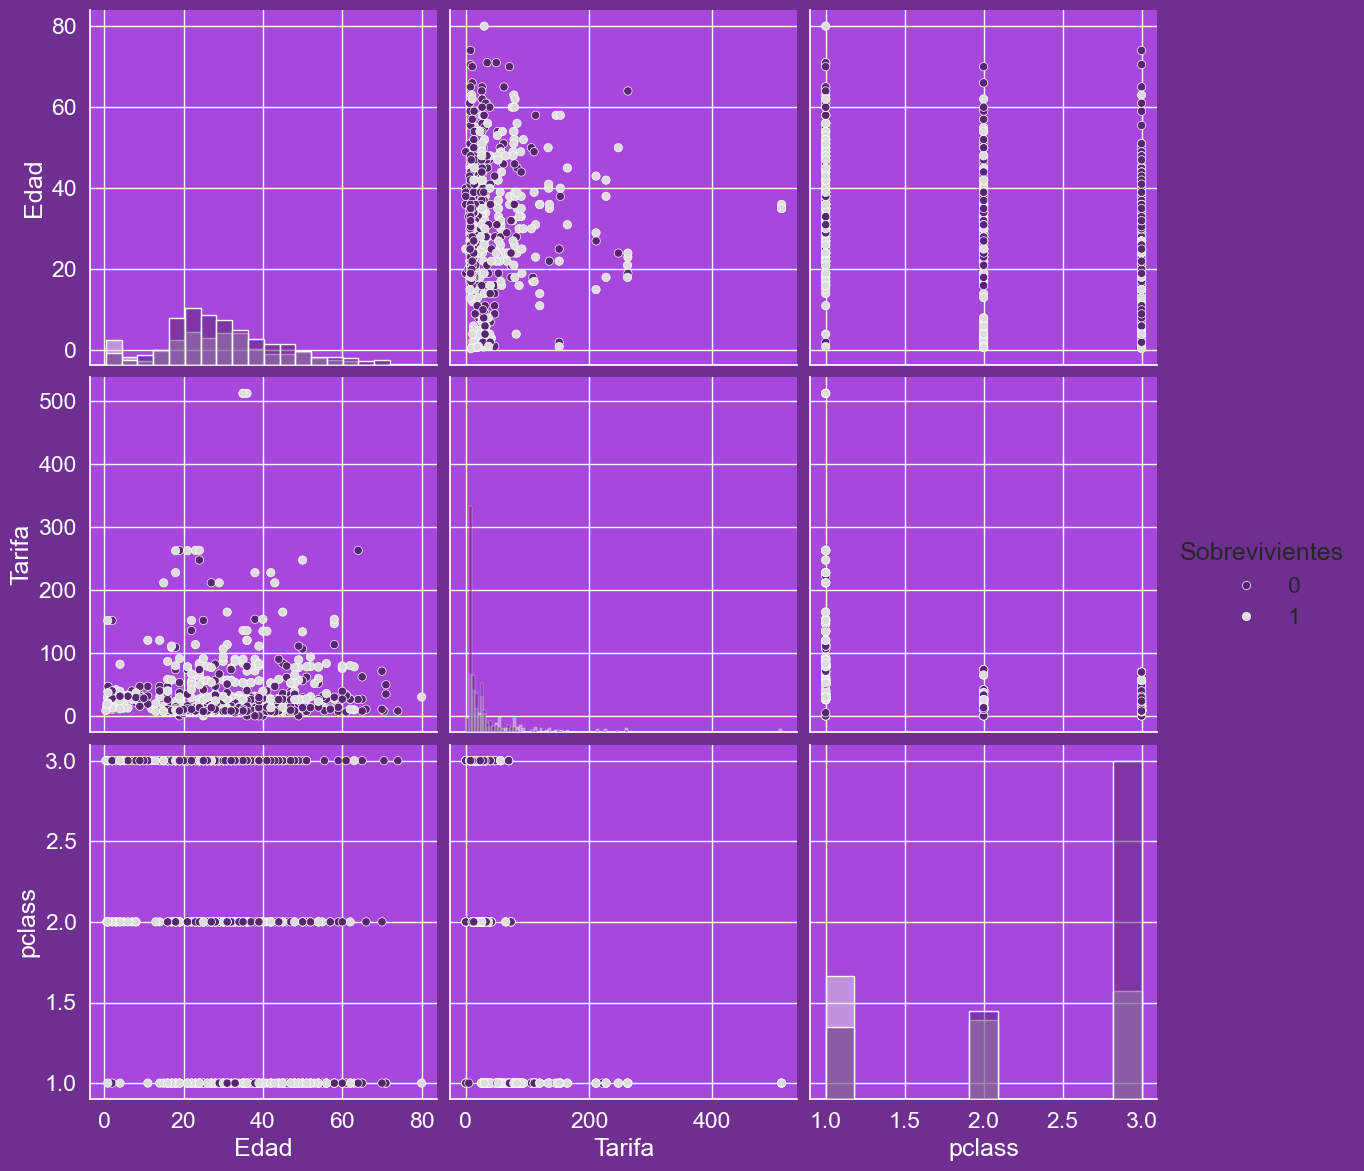

In [23]:
agrupados = sns.pairplot(datasetDF,  x_vars=["Edad","Tarifa","pclass"],  y_vars=["Edad","Tarifa","pclass"], height=4, 
                         hue="Sobrevivientes", diag_kind="hist")
plt.show()